# Load libraries

In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras import backend as K
from google.colab import files
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


# Cifar10 Dataset

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [0]:
# Helper function to plot some images in the dataset
def plot_cifar10(class_name=None):
  mapping = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4,
            'dog': 5, 'fog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
  
  if class_name == None:
    fig, ax = plt.subplots(10, 10, sharey=True, figsize=(11,10))
    for j in range(10):
      class_index = (y_train == j)[:,0]
      class_imgs = x_train[class_index,:,:][np.random.choice(5000, 10),:,:]
      for i, img in enumerate(class_imgs):
        ax[j,i].imshow(img)
        ax[j,i].grid('off')
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
        if i == 0:
          ax[j,i].set_ylabel(list(mapping.keys())[j])
  else:
    class_index = (y_train == mapping[class_name])[:,0]
    class_imgs = x_train[class_index,:,:][np.random.choice(5000, 10),:,:]
    fig, ax = plt.subplots(1, 10, sharey=True, figsize=(22,2))
    for i, img in enumerate(class_imgs):
      ax[i].imshow(img)
      ax[i].grid('off')
      ax[i].set_xticks([])
      ax[i].set_yticks([])
      if i == 0:
        ax[i].set_ylabel(class_name)
  
  

## Display some random images 

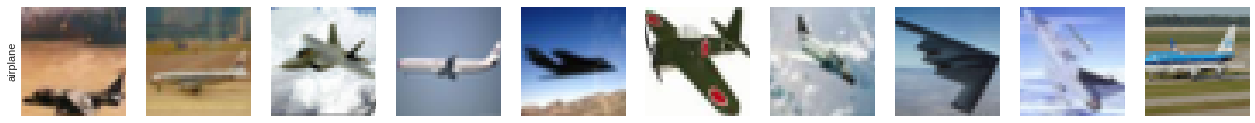

In [6]:
plot_cifar10('airplane')

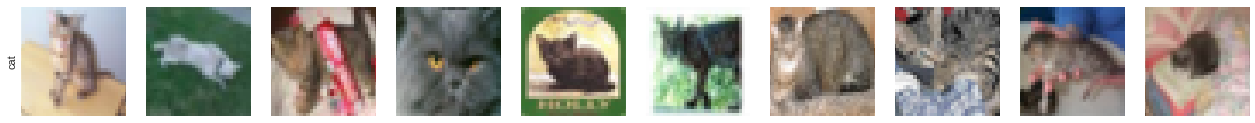

In [7]:
plot_cifar10('cat')

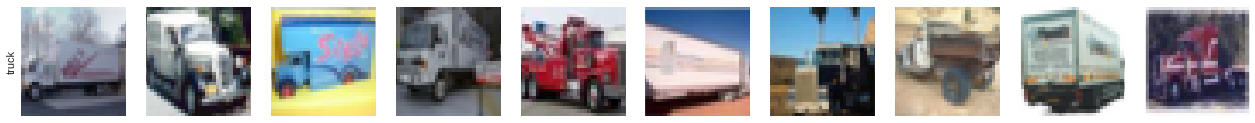

In [8]:
plot_cifar10('truck')

## Display 10 random images from each class

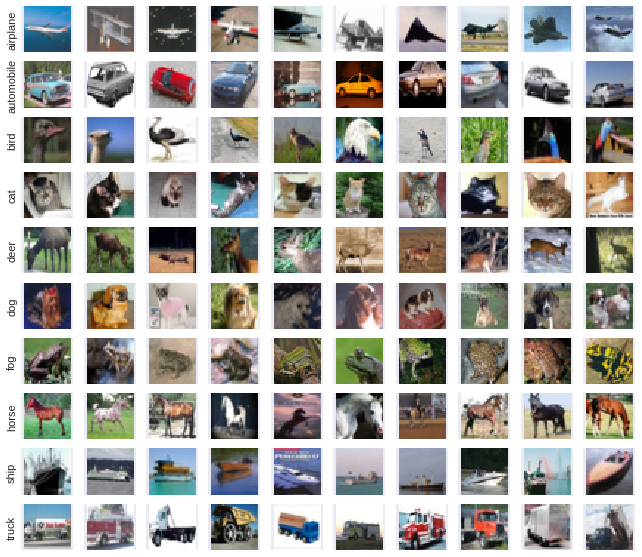

In [9]:
plot_cifar10()

# Train a two-layes neural network

## Build a neural network with Keras layers

In [0]:
# 2-layers NN
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=32 * 32 * 3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Configure the optimizer
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Preprocessing data 

In [0]:
# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Mean subtraction
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

# Convert labels to categorical one-hot encoding
train_labels = keras.utils.to_categorical(y_train, num_classes=10)
test_labels = keras.utils.to_categorical(y_test, num_classes=10)

# Reshape the train and test data into 1D vector
train_data = np.reshape(x_train, [x_train.shape[0], 32*32*3])
test_data = np.reshape(x_test, [x_test.shape[0], 32*32*3])

## Train and validate

In [12]:
model.fit(train_data, train_labels, validation_data=(test_data, test_labels),
          epochs=30, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 59us/step - loss: 1.6782 - acc: 0.4088 - val_loss: 1.5759 - val_acc: 0.4396
Epoch 2/30
50000/50000 [==============================] - 2s 37us/step - loss: 1.4453 - acc: 0.4930 - val_loss: 1.5508 - val_acc: 0.4532
Epoch 3/30
50000/50000 [==============================] - 2s 37us/step - loss: 1.3251 - acc: 0.5367 - val_loss: 1.5110 - val_acc: 0.4686
Epoch 4/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.2341 - acc: 0.5708 - val_loss: 1.4251 - val_acc: 0.5011
Epoch 5/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.1571 - acc: 0.5994 - val_loss: 1.4124 - val_acc: 0.5149
Epoch 6/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.0881 - acc: 0.6211 - val_loss: 1.3933 - val_acc: 0.5236


Epoch 7/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.0193 - acc: 0.6449 - val_loss: 1.4301 - val_acc: 0.5187
Epoch 8/30
50000/50000 [==============================] - 2s 37us/step - loss: 0.9569 - acc: 0.6692 - val_loss: 1.4403 - val_acc: 0.5257
Epoch 9/30
50000/50000 [==============================] - 2s 37us/step - loss: 0.8985 - acc: 0.6870 - val_loss: 1.4683 - val_acc: 0.5232
Epoch 10/30
50000/50000 [==============================] - 2s 37us/step - loss: 0.8471 - acc: 0.7053 - val_loss: 1.5108 - val_acc: 0.5152
Epoch 11/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.7935 - acc: 0.7249 - val_loss: 1.5994 - val_acc: 0.4945
Epoch 12/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.7393 - acc: 0.7434 - val_loss: 1.5393 - val_acc: 0.5327
Epoch 13/30
16896/50000 [=========>....................] - ETA: 1s - loss: 0.6718 - acc: 0.7692

50000/50000 [==============================] - 2s 37us/step - loss: 0.6925 - acc: 0.7594 - val_loss: 1.5446 - val_acc: 0.5295
Epoch 14/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.6452 - acc: 0.7780 - val_loss: 1.6471 - val_acc: 0.5280
Epoch 15/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.6057 - acc: 0.7916 - val_loss: 1.7328 - val_acc: 0.5115
Epoch 16/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.5657 - acc: 0.8062 - val_loss: 1.7718 - val_acc: 0.5188
Epoch 17/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.5230 - acc: 0.8221 - val_loss: 1.8340 - val_acc: 0.5124
Epoch 18/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.4916 - acc: 0.8307 - val_loss: 1.9416 - val_acc: 0.5072
Epoch 19/30
19712/50000 [==========>...................] - ETA: 1s - loss: 0.4377 - acc: 0.8514

50000/50000 [==============================] - 2s 38us/step - loss: 0.4559 - acc: 0.8457 - val_loss: 1.8895 - val_acc: 0.5200
Epoch 20/30
50000/50000 [==============================] - 2s 37us/step - loss: 0.4250 - acc: 0.8546 - val_loss: 1.9139 - val_acc: 0.5296
Epoch 21/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.3962 - acc: 0.8637 - val_loss: 2.0595 - val_acc: 0.5186
Epoch 22/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.3673 - acc: 0.8758 - val_loss: 2.2132 - val_acc: 0.4945
Epoch 23/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.3446 - acc: 0.8826 - val_loss: 2.1585 - val_acc: 0.5183
Epoch 24/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.3201 - acc: 0.8913 - val_loss: 2.2841 - val_acc: 0.5096
Epoch 25/30
22016/50000 [============>.................] - ETA: 0s - loss: 0.2836 - acc: 0.9060

50000/50000 [==============================] - 2s 38us/step - loss: 0.2990 - acc: 0.8994 - val_loss: 2.2772 - val_acc: 0.5204
Epoch 26/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.2769 - acc: 0.9061 - val_loss: 2.4668 - val_acc: 0.5046
Epoch 27/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.2623 - acc: 0.9125 - val_loss: 2.4410 - val_acc: 0.5184
Epoch 28/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.2490 - acc: 0.9163 - val_loss: 2.5828 - val_acc: 0.5099
Epoch 29/30
50000/50000 [==============================] - 2s 36us/step - loss: 0.2313 - acc: 0.9222 - val_loss: 2.5557 - val_acc: 0.5238
Epoch 30/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.2202 - acc: 0.9259 - val_loss: 2.7491 - val_acc: 0.5169


# Using a pretrained model

## Download an image to the current working folder

In [13]:
files.upload()

{}

## Load the image and show

In [0]:
img_path = '2_h0osln.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)

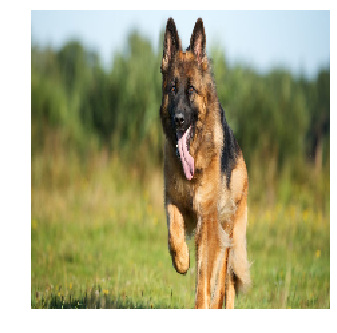

In [15]:
plt.imshow(np.asarray(x, dtype='uint8'))
plt.axis('off')
plt.show()

## Choose a pretrained model

In [0]:
model = ResNet50(weights='imagenet')

## Using the model to classify an image

In [0]:
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

In [18]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02106662', 'German_shepherd', 0.6532916), ('n02105162', 'malinois', 0.34586835), ('n02105056', 'groenendael', 0.00037036164)]
